# 城市气候与海洋的关系研究

导入包

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

导入数据各个海滨城市数据
- os.listdir('data')
- filter() 过滤出所有.csv文件, 返回一个可迭代的Filter对象
- df.append() 以行的方式追加, <font color=red>返回一个新的DataFrame</font>

In [2]:
import os

In [33]:
csv_files = os.listdir('data')
# 只获取到.csv文件
# csv_files = list(filter(lambda f: f.endswith('.csv'),
#                         csv_files))
# print(csv_files)
# df = pd.read_csv('data/bologna_150715.csv')
# df.head()
all_ = None
existed_header = False
for csv_file in filter(lambda f: f.endswith('.csv'),
                       csv_files):
    if not existed_header:
        # 第一次创建头
        all_ = DataFrame(pd.read_csv(f'data/{csv_file}'))
        existed_header = True
        print(all_.shape)
    else:
        # append()返回一个新的DataFrame
        all_ = all_.append(pd.read_csv(f'data/{csv_file}'),
                           ignore_index=True)

(24, 11)


查看列数

In [34]:
all_.columns

Index(['Unnamed: 0', 'temp', 'humidity', 'pressure', 'description', 'dt',
       'wind_speed', 'wind_deg', 'city', 'day', 'dist'],
      dtype='object')

In [35]:
all_.shape

(675, 11)

去除没用的列

In [37]:
all_.tail()

,Unnamed: 0,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
670,19,24.65,83,1007.0,moderate rain,1437799262,0.50,180.000,Ravenna,2015-07-25 06:41:02,8
671,20,25.40,78,1007.0,few clouds,1437802784,0.50,190.000,Ravenna,2015-07-25 07:39:44,8
672,21,27.23,54,1008.0,Sky is Clear,1437806426,2.61,254.001,Ravenna,2015-07-25 08:40:26,8
673,22,31.14,58,1008.0,moderate rain,1437809988,3.87,257.503,Ravenna,2015-07-25 09:39:48,8
674,23,31.46,52,1008.0,Sky is Clear,1437813634,1.00,190.000,Ravenna,2015-07-25 10:40:34,8


In [38]:
all_.drop('Unnamed: 0', axis=1, inplace=True)
all_.head()

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,29.98,57,1021.0,Sky is Clear,1436863101,0.51,90.0,Bologna,2015-07-14 10:38:21,71
1,30.26,51,1021.0,moderate rain,1436866691,1.03,157.0,Bologna,2015-07-14 11:38:11,71
2,32.36,46,1021.0,sky is clear,1436870392,2.06,67.0,Bologna,2015-07-14 12:39:52,71
3,31.16,47,1021.0,moderate rain,1436874000,2.06,90.0,Bologna,2015-07-14 13:40:00,71
4,33.48,44,1021.0,sky is clear,1436877549,2.06,135.0,Bologna,2015-07-14 14:39:09,71


In [39]:
# 查看有哪些城市
all_['city'].unique()

array(['Bologna', 'Piacenza', 'Torino', 'Ferrara', 'Milano', 'Asti',
       'Mantova', 'Ravenna', 'Cesena', 'Faenza'], dtype=object)

In [40]:
all_.dtypes

temp           float64
humidity         int64
pressure       float64
description     object
dt               int64
wind_speed     float64
wind_deg       float64
city            object
day             object
dist             int64
dtype: object

显示最高温度与离海远近的关系
- 按city分组， 计算temp和dist的最大值
- 按dist排序

In [43]:
city_temp = all_.groupby('city')['temp', 'dist'].max()
city_temp.sort_values('dist', inplace=True)

画图显示关系 
- scatter() 显示距离与温度的散布图
- plot() 显示距离与温度的线形图

In [44]:
city_temp

,temp,dist
city,,
Ravenna,32.79,8
Cesena,32.81,14
Faenza,32.74,37
Ferrara,33.43,47
Bologna,33.85,71
Mantova,34.18,121
Piacenza,33.92,200
Milano,34.81,250
Asti,34.31,315


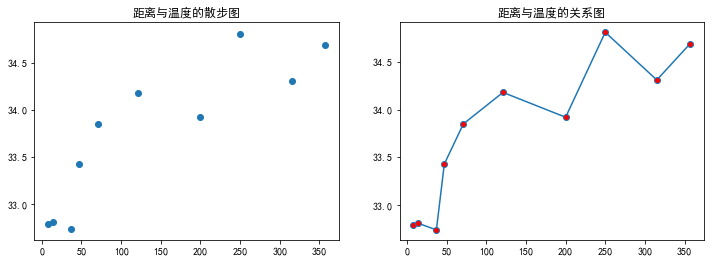

In [46]:
# 获取图形对象
fig = plt.figure(figsize=(12, 4))

# 创建scatter子画布
ax1 = fig.add_subplot(121)
ax1.scatter(city_temp['dist'],
            city_temp['temp'])
ax1.set_title('距离与温度的散步图')

ax2 = fig.add_subplot(122)
ax2.plot(city_temp['dist'], city_temp['temp'],
         marker='o', markerfacecolor='r')
ax2.set_title('距离与温度的关系图')

plt.show()

 练习
 
 读取某一城市 每天的温度变化和 一周的天气变化

In [50]:
from datetime import datetime
def get_date(item):
    dt = datetime.strptime(item, '%Y-%m-%d %H:%M:%S')
    return dt.strftime('%Y-%m-%d')

In [51]:
ravenna = all_[all_['city'] == 'Ravenna']
ravenna['day'] = ravenna['day'].transform(get_date)
ravenna['day'].unique

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<bound method Series.unique of 208    2015-07-14
209    2015-07-14
210    2015-07-14
211    2015-07-14
212    2015-07-14
213    2015-07-14
214    2015-07-14
215    2015-07-14
216    2015-07-14
217    2015-07-14
218    2015-07-14
219    2015-07-14
220    2015-07-14
221    2015-07-14
222    2015-07-15
223    2015-07-15
224    2015-07-15
225    2015-07-15
226    2015-07-15
227    2015-07-15
228    2015-07-15
229    2015-07-15
230    2015-07-15
231    2015-07-15
546    2015-06-27
547    2015-06-27
548    2015-06-27
549    2015-06-27
550    2015-06-27
551    2015-06-27
          ...    
558    2015-06-28
559    2015-06-28
560    2015-06-28
561    2015-06-28
562    2015-06-28
563    2015-06-28
651    2015-07-24
652    2015-07-24
653    2015-07-24
654    2015-07-24
655    2015-07-24
656    2015-07-24
657    2015-07-24
658    2015-07-24
659    2015-07-24
660    2015-07-24
661    2015-07-24
662    2015-07-24
663    2015-07-24
664    2015-07-25
665    2015-07-25
666    2015-07-25
667    2015-07-

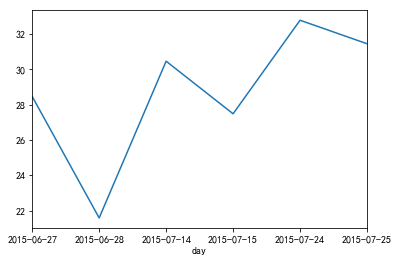

In [55]:
ravenna.sort_values('day').groupby('day')['temp'].max().plot()

画出 Asti 城市的每天的温度变化的线形图
- 处理 day 时间格式

观察发现，离海近的可以形成一条直线，离海远的也能形成一条直线。

分别以100公里和50公里为分界点，划分为离海近和离海远的两组数据
- city_temp['dist'] > 50  # 远距离
- city_temp['dist'] < 100 # 近距离

In [57]:
city_temp = all_[['city', 'temp', 'dist']]
city_temp.head()

,city,temp,dist
0,Bologna,29.98,71
1,Bologna,30.26,71
2,Bologna,32.36,71
3,Bologna,31.16,71
4,Bologna,33.48,71


In [60]:
city_temp = city_temp.groupby('city')['dist', 'temp'].max()
far_city = city_temp[city_temp['dist'] > 50]  # 远距离
near_city = city_temp[city_temp['dist'] < 100] # 近距离

In [61]:
display(far_city.shape, near_city.shape)

(6, 2)

(5, 2)

画出远、近的距离与温度的散布图

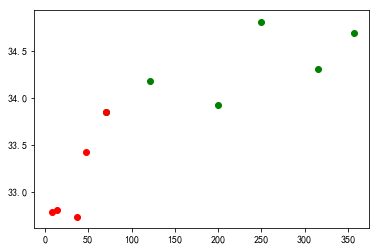

In [63]:
plt.scatter(far_city['dist'], far_city['temp'], color='g')
plt.scatter(near_city['dist'], near_city['temp'], color='r')
plt.show()

使用线性回归预测给定距离的温度
-  机器学习的线性回归模型 LinearRegression
-  scikit-learn 模块中线性模型
    - sklearn.linear_model
- 创建回归模型对象
    - linear = LinearRegression()
- 训练模型
    - fit(x, y) 
        - x 是实际数据的自变量, 必须是 二维数组
        - y 实际数据的因变量
- 预测模型
    - predict(x) 根据预测函数，计算x的结果
        - x 也是一个二维数组

In [64]:
from sklearn.linear_model import LinearRegression

创建线性回归模型对象

In [65]:
lm = LinearRegression()

训练模型
- 一个被训练过的模型，就是一个预测函数表达式f(x) = wx+b

In [67]:
near_city['dist'].values.reshape(-1,1)

array([[71],
       [14],
       [37],
       [47],
       [ 8]])

In [68]:
X = near_city['dist'].values.reshape(-1, 1)  # 特征的数据集
y = near_city['temp'].values.reshape(-1, 1)  # 目标的数据集
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

 预测模型  

In [69]:
near_city

,dist,temp
city,,
Bologna,71,33.85
Cesena,14,32.81
Faenza,37,32.74
Ferrara,47,33.43
Ravenna,8,32.79


In [70]:
lm.predict([[7], [20],[30],[47], [70]])

array([[ 32.63872647],
       [ 32.86085872],
       [ 33.03172968],
       [ 33.32221032],
       [ 33.71521353]])

预测100个近距离数据的温度

In [71]:
near_X = np.linspace(1, 100, num=100).reshape(-1,1)
near_y = lm.predict(near_X)
near_y

array([[ 32.53620389],
       [ 32.55329098],
       [ 32.57037808],
       [ 32.58746518],
       [ 32.60455227],
       [ 32.62163937],
       [ 32.63872647],
       [ 32.65581356],
       [ 32.67290066],
       [ 32.68998775],
       [ 32.70707485],
       [ 32.72416195],
       [ 32.74124904],
       [ 32.75833614],
       [ 32.77542324],
       [ 32.79251033],
       [ 32.80959743],
       [ 32.82668452],
       [ 32.84377162],
       [ 32.86085872],
       [ 32.87794581],
       [ 32.89503291],
       [ 32.91212001],
       [ 32.9292071 ],
       [ 32.9462942 ],
       [ 32.96338129],
       [ 32.98046839],
       [ 32.99755549],
       [ 33.01464258],
       [ 33.03172968],
       [ 33.04881678],
       [ 33.06590387],
       [ 33.08299097],
       [ 33.10007807],
       [ 33.11716516],
       [ 33.13425226],
       [ 33.15133935],
       [ 33.16842645],
       [ 33.18551355],
       [ 33.20260064],
       [ 33.21968774],
       [ 33.23677484],
       [ 33.25386193],
       [ 33

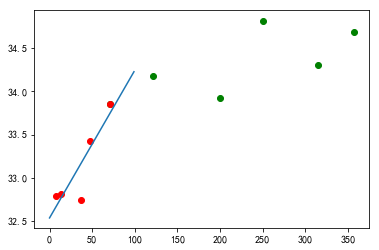

In [72]:
plt.scatter(far_city['dist'], far_city['temp'], color='g')
plt.scatter(near_city['dist'], near_city['temp'], color='r')
plt.plot(near_y)
plt.show()

训练远距离和温度的模型

预测100个远距离的温度

最低湿度与海洋距离的关系
- 按城市 city 分组, 计算湿度 humidity 与距离dist的最小值
- 按距离dist排序

画散点图和线型图

最高湿度与海洋距离的关系

平均湿度与海洋距离的关系

思考：模仿最高温度，得到平均湿度与海洋距离的回归曲线

风向与风速的关系
- 查看Asti城市的风向wind_deg与风速wind_speed
- 按wind_deg风向排序
- 重新创建索引 reset_index()

In [78]:
columns = ['wind_deg', 'wind_speed', 'dist', 'humidity']
asti = all_[all_['city'] == 'Asti'][columns]
asti.sort_values('wind_deg', inplace=True)
asti.reset_index(drop=True, inplace=True) 
asti.head()

,wind_deg,wind_speed,dist,humidity
0,0.0,1.0,315,68
1,0.0,0.5,315,83
2,0.0,2.1,315,48
3,0.0,1.0,315,54
4,0.0,1.0,315,65


画出风向与风速的线性图

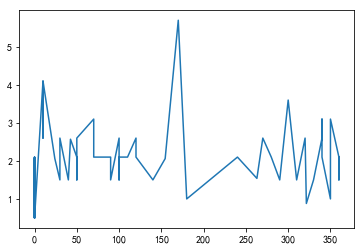

In [77]:
plt.plot(asti['wind_deg'], asti['wind_speed'])

在子图中，同时比较风向与湿度和风力的关系

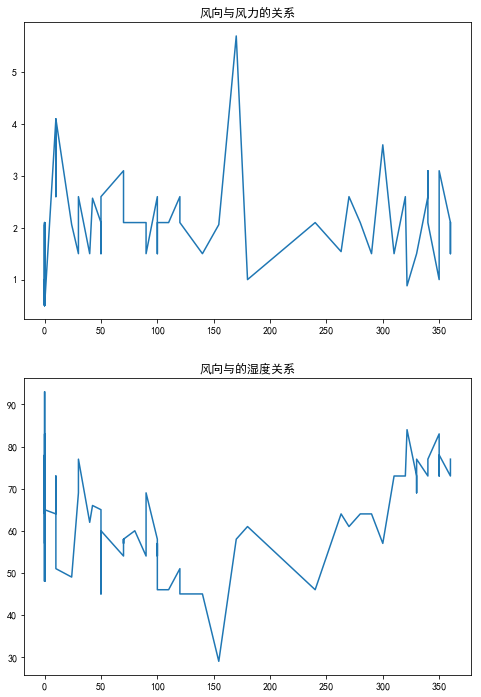

In [80]:
fig = plt.figure(figsize=(8, 12))
ax1 = fig.add_subplot(211)
ax1.plot(asti['wind_deg'], asti['wind_speed'])
ax1.set_title('风向与风力的关系')

ax2 = fig.add_subplot(212)
ax2.plot(asti['wind_deg'], asti['humidity'])
ax2.set_title('风向与的湿度关系')

plt.show()

In [86]:
asti_wind = asti.groupby('wind_deg')['wind_speed'].mean()
asti_wind = DataFrame(asti_wind) # Series的name作为列名
asti_wind.reset_index(inplace=True) # 重新生成索引，原索引转为列
asti_wind

,wind_deg,wind_speed
0,0.000,1.018667
1,10.000,3.600000
2,24.000,2.060000
3,30.000,2.050000
4,40.000,1.500000
5,42.501,2.570000
6,50.000,2.075000
7,70.000,2.600000
8,80.000,2.100000
9,90.000,1.800000


角度 转成 弧度 
- 角度/180 = 弧度/pi， 弧度 = 角度 * pi / 180

asti_wind[(asti_wind['wind_deg'] >= deg) & (asti_wind['wind_deg'] < 45+deg)]['wind_deg']

由于风向是360度，我们可以考虑使用玫瑰图（极坐标条形图）

In [91]:
# 计算0~ 45之间的所有风速
asti_wind['wind_speed'][(asti_wind['wind_deg'] >= 0) & (asti_wind['wind_deg'] < 45+0)].mean()

2.133111111111111

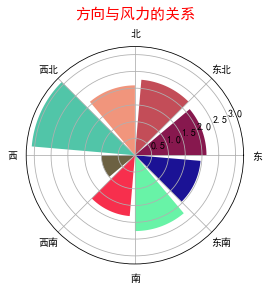

In [92]:
ax = plt.subplot(polar=True)  # 极坐标条形图

# x 坐标方向(八个方向)
degs = np.arange(0, 360, step=45)  # ［0, 45, ....315]

# y轴的数值hegiht x 坐标的个数保持一致
# y轴的数值 每个方向对应的风速有多个，则计算出它的平均风速
heights = [asti_wind['wind_speed'][(asti_wind['wind_deg'] >= deg) 
                      & (asti_wind['wind_deg'] < 45+deg)].mean() for deg in degs]

index = degs*np.pi/180  # 将八个角度转成八弧度

ax.bar(index, heights,
       color=np.random.random(size=(8, 3)),
       align='edge', width=0.7) # 起始的对齐方式

ax.set_xticklabels(['东', '东北', '北', '西北', '西', '西南', '南', '东南'])
ax.set_title('方向与风力的关系', color='r',
            position=(0.5, 1.1), fontsize=15)
plt.show()

首先自定义一个画图函数

用numpy创建一个直方图，将360度划分为8个面元，将数据分类到这8个面元中

In [93]:
def drop_polar(city, compare_colname, title=None):
    # 获取指定城市的 风向与某一列比较的信息
    city_wind = all_[all_['city'] == city][['wind_deg', compare_colname]]
    city_wind.sort_values('wind_deg', inplace=True) # 按方向排序
    city_wind.reset_index(drop=True, inplace=True)
   
    # 8个方向角度
    degs = np.arange(0, 360, step=45) 
    
    #获取每个方向上的数据的平均值
    heights = [city_wind[compare_colname][(city_wind['wind_deg'] >= deg) &
                         (city_wind['wind_deg'] < 45+deg)].mean() for deg in degs]
    
    # 将角度转为弧度:  角度/360 = 弧度/2*pi
    x = [ deg*np.pi/180  for deg in degs]

    plt.figure(figsize=(6, 6))
    plt.axes(polar = True, frameon=True)

    plt.bar(x, height=heights,
        align='edge',
        bottom=0.1, color=np.random.random(size=(8,3)))
    
    plt.xticks(x, ('东', '东北', '北', '西北', '西', '西南', '南', '东南'),
              fontsize=14)
    
    if title:
        plt.title(city+'城市的'+title,fontsize=20, color='r',
                  loc='center', position=(0.5,1.1))
    plt.show()

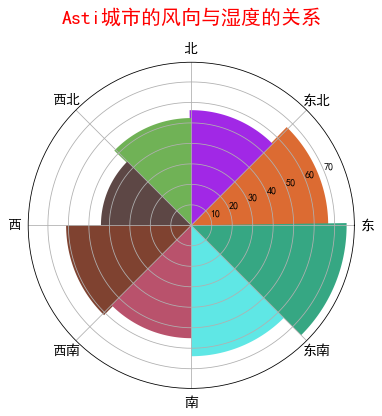

In [97]:
drop_polar('Asti', 'humidity', '风向与湿度的关系')

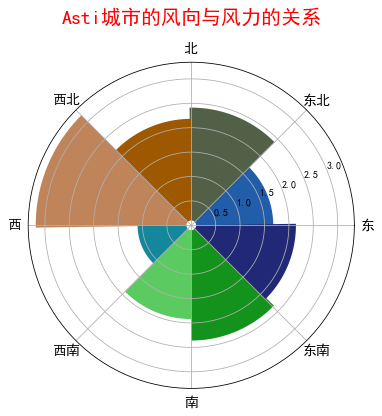

In [96]:
drop_polar('Asti', 'wind_speed', '风向与风力的关系')

练习： 计算米兰各个方向上的风速